In [23]:
# This file is meant to convert csv files that are made from the code samImagentRealtime.py
# into a matrix with the 16 Oxy and Deoxy Data Values and the last value 
# in the array is the cognitive load value

from numpy import genfromtxt
import numpy as np
import pandas as pd

#Open the file
#MAKE SURE TO RENAME FILE
f = open('Eyes.csv', 'r')
my_data = f.readlines()
a = []


#Gets the Deoxy and Oxy Values
num_lines = int(sum(1 for line in open('Eyes.csv')))
for i in range(num_lines):
    data = my_data[i]
    a.append(data.split(',')[1])
    first = False

num_rows = int(num_lines/16)

b = np.zeros(shape=(num_rows,17))
k = 0

for i in range(num_rows):
    for j in range(16): 
        b[i,j] = a[k]
        k = k + 1
        
        
#get the cognitive value 
for i in range(num_rows):
    j = i * 16
    data = my_data[j]
    b[i,16] = (data.split((',')[0]))[2]
        

#print(b)
        


    

[[  9.38900000e-04   1.70600000e-03   4.84200000e-05   3.23200000e-05
   -1.27900000e-04   5.56300000e-06   1.14700000e-05  -6.49800000e-05
    1.62400000e-03  -1.97700000e-03   2.19800000e-06  -1.44800000e-06
   -2.59800000e-04   1.39500000e-05  -4.49200000e-05   1.44200000e-05
    1.00000000e+00]
 [ -1.33400000e-03   4.35100000e-04  -1.69200000e-04   8.19400000e-05
   -1.71900000e-04   3.40800000e-05  -3.61300000e-05  -4.68500000e-05
   -5.55400000e-03   1.24700000e-03  -6.19600000e-05   4.34500000e-05
   -3.97100000e-04   5.42500000e-05  -3.00300000e-04   6.66900000e-05
    1.00000000e+00]
 [  4.04400000e-03  -2.53600000e-03  -1.48600000e-05   5.36100000e-05
   -2.85200000e-04  -1.39700000e-05  -1.47400000e-04   9.39500000e-06
   -6.23900000e-04  -3.06500000e-04  -1.22100000e-04   5.30400000e-05
   -4.30900000e-04   3.01800000e-05  -3.40600000e-04   5.46400000e-05
    1.00000000e+00]
 [  2.70300000e-03   1.90300000e-04   4.40300000e-05   4.33400000e-05
   -3.65800000e-04   4.3740000

In [2]:
# Opening a csv file for reading
f = open('mastereyes.csv', 'w')


def readToCsv(data):
    #rows = [[row[0]], [row[1]], [row[2]], [row[3]], [row[4]], [row[5]], [row[6]], [row[7]], [row[8]], [row[9]], [row[10]], [row[11]], [row[12]], [row[13]], [row[14]], [row[15]]]
    df = pd.DataFrame(data)
    df.to_csv(f, header=False)
    #dataset = pd.read_csv("output.csv")
    # adding column labels
    #dataset.columns=['Oxy1','DeOxy1','Oxy2','DeOxy2','Oxy3','DeOxy3', 'Oxy4','DeOxy4','Oxy5','DeOxy5','Oxy6','DeOxy6','Oxy7','DeOxy7','Oxy8','DeOxy8']


readToCsv(b)


In [6]:
# test files
mastereyes = pd.read_csv("mastereyes.csv")

# decide which dataset to load
dataset = mastereyes

# adding column labels
dataset.columns=['unused','Oxy1','DeOxy1','Oxy2','DeOxy2','Oxy3','DeOxy3', 'Oxy4','DeOxy4','Oxy5','DeOxy5','Oxy6','DeOxy6','Oxy7','DeOxy7','Oxy8','DeOxy8', 'Eyes']

dataset.columns

Index(['unused', 'Oxy1', 'DeOxy1', 'Oxy2', 'DeOxy2', 'Oxy3', 'DeOxy3', 'Oxy4',
       'DeOxy4', 'Oxy5', 'DeOxy5', 'Oxy6', 'DeOxy6', 'Oxy7', 'DeOxy7', 'Oxy8',
       'DeOxy8', 'Eyes'],
      dtype='object')

Train on 33 samples, validate on 15 samples
Epoch 1/1000
33/33 [==============================] - 0s - loss: 0.2501 - acc: 0.5758 - val_loss: 0.2500 - val_acc: 0.4667
Epoch 2/1000
33/33 [==============================] - 0s - loss: 0.2500 - acc: 0.5455 - val_loss: 0.2500 - val_acc: 0.4667
Epoch 3/1000
33/33 [==============================] - 0s - loss: 0.2499 - acc: 0.5455 - val_loss: 0.2501 - val_acc: 0.4667
Epoch 4/1000
33/33 [==============================] - 0s - loss: 0.2499 - acc: 0.5455 - val_loss: 0.2501 - val_acc: 0.4667
Epoch 5/1000
33/33 [==============================] - 0s - loss: 0.2497 - acc: 0.5455 - val_loss: 0.2502 - val_acc: 0.4667
Epoch 6/1000
33/33 [==============================] - 0s - loss: 0.2496 - acc: 0.5455 - val_loss: 0.2504 - val_acc: 

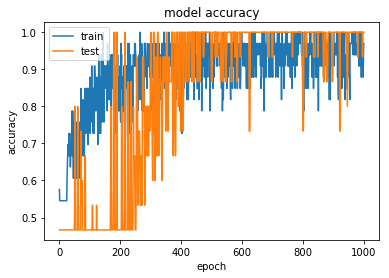

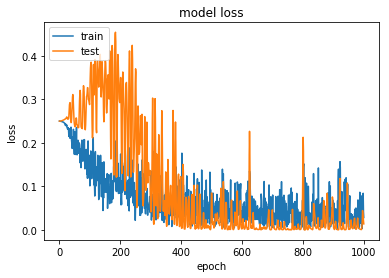

In [9]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.layers import Dropout
from keras.optimizers import RMSprop
from keras import optimizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy
import keras

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# decide dataset

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Remove missing values
dataset = dataset.dropna()

# shuffle the data
dataset = dataset.sample(frac=1)

# Oxy channel one and two
#Oxy1_2 = np.array(dataset["Oxy2"], dataset["Oxy3"])

AllChannels = np.column_stack((dataset["Oxy1"], dataset["Oxy2"], dataset["Oxy3"], dataset["Oxy4"], dataset["Oxy5"], dataset["Oxy6"], dataset["Oxy7"], dataset["Oxy8"], dataset["DeOxy1"], dataset["DeOxy2"], dataset["DeOxy3"], dataset["DeOxy4"], dataset["DeOxy5"], dataset["DeOxy6"], dataset["DeOxy7"], dataset["DeOxy8"] ))

#Oxy1_2 = np.column_stack((dataset["Oxy2"], dataset["Oxy2"]))

# using Oxygenation channel 
# input shape is the number of variables inside the X array
X = AllChannels
#X = np.array(dataset.ix[:,4], dataset.ix[:,5], dataset.ix[:,6], dataset.ix[:,7], dataset.ix[:,8], dataset.ix[:,9], dataset.ix[:,10], dataset.ix[:,11], dataset.ix[:,12], dataset.ix[:,13], dataset.ix[:,14], dataset.ix[:,15], dataset.ix[:,16], dataset.ix[:,17], dataset.ix[:,18], dataset.ix[:,19])
Y = np.array([[1,0] if i == 0 else [0,1] for i in dataset.Eyes])


# Dropout - the number of neurons removed at each layers, who are readded when testing
# Batch size - the number of data points added at each time, affects training time
# Epochs - the number of training/test sessions

# create model
model = Sequential()

# batchnormalization, makes the value fit between 0-1
model.add(BatchNormalization(input_shape=(16, )))
model.add(Dropout(0.5))
model.add(Dense(100, init="normal", activation='relu'))
model.add(Dense(100, init="normal", activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, init="normal", activation='relu'))
model.add(Dense(100, init="normal", activation='relu'))
#model.add(Dense(100, init='uniform', activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))

# output layer guesses low or high cognitive load
model.add(Dense(2, init="normal", activation='softmax'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.3, nb_epoch=1000, batch_size=25, verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [10]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("eyes.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("eyes.h5")
print("Saved model to disk")

# later...

Saved model to disk
